## E-Commerce Sales Analysis using Python & Pandas

In [33]:
import pandas as pd
import numpy as np

In [34]:
customers = pd.read_csv(r"C:\Users\Dell\Downloads\pyhton project\customers.csv")
orders = pd.read_csv(r"C:\Users\Dell\Downloads\pyhton project\orders(1).csv")

In [35]:
customers.head()

,customer_id,name,gender,age,city,state,signup_date,segment
0,1,Customer_1,Male,38,Delhi,Karnataka,2023-11-24,Premium
1,2,Customer_2,Female,49,Pune,Karnataka,2023-02-27,Regular
2,3,Customer_3,Male,40,Chennai,Tamil Nadu,2023-01-13,Gold
3,4,Customer_4,Male,50,Delhi,Karnataka,2023-05-21,Regular
4,5,Customer_5,Male,20,Chennai,Delhi,2023-05-06,Gold


In [37]:
orders.head()

,order_id,customer_id,order_date,product_category,product_name,quantity,price_per_unit,payment_mode,order_status
0,1,425,2023-05-14,Clothing,Product_40,4,4322.29,Cash on Delivery,Cancelled
1,2,390,2023-04-02,Electronics,Product_45,2,1442.95,Debit Card,Cancelled
2,3,25,2023-10-25,Clothing,Product_26,2,4054.65,Cash on Delivery,Delivered
3,4,141,2023-05-16,Sports,Product_42,1,1056.68,Debit Card,Cancelled
4,5,117,2023-01-20,Sports,Product_6,3,1792.18,UPI,Cancelled


In [38]:
customers.shape

(500, 8)

In [39]:
orders.shape

(700, 9)

## DATA TYPES and NULL CHECK

In [40]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  500 non-null    int64 
 1   name         500 non-null    object
 2   gender       500 non-null    object
 3   age          500 non-null    int64 
 4   city         500 non-null    object
 5   state        500 non-null    object
 6   signup_date  500 non-null    object
 7   segment      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [41]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          700 non-null    int64  
 1   customer_id       700 non-null    int64  
 2   order_date        700 non-null    object 
 3   product_category  700 non-null    object 
 4   product_name      700 non-null    object 
 5   quantity          700 non-null    int64  
 6   price_per_unit    700 non-null    float64
 7   payment_mode      700 non-null    object 
 8   order_status      700 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 49.3+ KB


## CHECK MISSING VALUES

In [42]:
customers.isnull().sum()

customer_id    0
name           0
gender         0
age            0
city           0
state          0
signup_date    0
segment        0
dtype: int64

In [43]:
orders.isnull().sum()

order_id            0
customer_id         0
order_date          0
product_category    0
product_name        0
quantity            0
price_per_unit      0
payment_mode        0
order_status        0
dtype: int64

## CHECK DUPLICATE VALUES

In [44]:
customers.duplicated().sum()

np.int64(0)

In [45]:
orders.duplicated().sum()

np.int64(0)

#CONVERT DATE COLUMNS

In [46]:
customers['signup_date'] = pd.to_datetime(customers['signup_date'])
orders['order_date'] = pd.to_datetime(orders['order_date'])

In [47]:
customers.dtypes
orders.dtypes

order_id                     int64
customer_id                  int64
order_date          datetime64[ns]
product_category            object
product_name                object
quantity                     int64
price_per_unit             float64
payment_mode                object
order_status                object
dtype: object

## CREATE NEW COLUMN ----> total_amount

In [48]:
orders['total_amount'] = orders['quantity'] * orders['price_per_unit']

In [49]:
orders.head()

,order_id,customer_id,order_date,product_category,product_name,quantity,price_per_unit,payment_mode,order_status,total_amount
0,1,425,2023-05-14,Clothing,Product_40,4,4322.29,Cash on Delivery,Cancelled,17289.16
1,2,390,2023-04-02,Electronics,Product_45,2,1442.95,Debit Card,Cancelled,2885.90
2,3,25,2023-10-25,Clothing,Product_26,2,4054.65,Cash on Delivery,Delivered,8109.30
3,4,141,2023-05-16,Sports,Product_42,1,1056.68,Debit Card,Cancelled,1056.68
4,5,117,2023-01-20,Sports,Product_6,3,1792.18,UPI,Cancelled,5376.54


## In this step, both datasets were merged using customer_id to create a unified dataframe for analysis.

In [50]:
df = pd.merge(orders, customers, on='customer_id', how='inner')

In [51]:
df.head()


,order_id,customer_id,order_date,product_category,product_name,quantity,price_per_unit,payment_mode,order_status,total_amount,name,gender,age,city,state,signup_date,segment
0,1,425,2023-05-14,Clothing,Product_40,4,4322.29,Cash on Delivery,Cancelled,17289.16,Customer_425,Female,23,Delhi,Tamil Nadu,2023-05-15,Gold
1,2,390,2023-04-02,Electronics,Product_45,2,1442.95,Debit Card,Cancelled,2885.90,Customer_390,Male,40,Pune,Delhi,2023-09-28,Premium
2,3,25,2023-10-25,Clothing,Product_26,2,4054.65,Cash on Delivery,Delivered,8109.30,Customer_25,Female,56,Bangalore,Maharashtra,2023-12-26,Regular
3,4,141,2023-05-16,Sports,Product_42,1,1056.68,Debit Card,Cancelled,1056.68,Customer_141,Female,20,Hyderabad,Karnataka,2023-11-02,Regular
4,5,117,2023-01-20,Sports,Product_6,3,1792.18,UPI,Cancelled,5376.54,Customer_117,Male,53,Bangalore,Telangana,2023-03-15,Regular


In [52]:
orders.head()

,order_id,customer_id,order_date,product_category,product_name,quantity,price_per_unit,payment_mode,order_status,total_amount
0,1,425,2023-05-14,Clothing,Product_40,4,4322.29,Cash on Delivery,Cancelled,17289.16
1,2,390,2023-04-02,Electronics,Product_45,2,1442.95,Debit Card,Cancelled,2885.90
2,3,25,2023-10-25,Clothing,Product_26,2,4054.65,Cash on Delivery,Delivered,8109.30
3,4,141,2023-05-16,Sports,Product_42,1,1056.68,Debit Card,Cancelled,1056.68
4,5,117,2023-01-20,Sports,Product_6,3,1792.18,UPI,Cancelled,5376.54


#total_amount of Delivered order_status

In [53]:
df[df['order_status'] == 'Delivered']['total_amount'].sum()

np.float64(1396948.4200000002)

## Solving Questions using Data Analysis


## Q1:What is the Total Revenue?

In [54]:
total_revenue = df['total_amount'].sum()
round(total_revenue, 2)

np.float64(4421340.98)

## Q2:Revenue from Delivered Orders Only

In [55]:
delivered_revenue = df[df['order_status'] == 'Delivered']['total_amount'].sum()
round(delivered_revenue, 2)

np.float64(1396948.42)

## Q3:Order Status Distribution

In [56]:
df['order_status'].value_counts()

order_status
Returned     247
Cancelled    239
Delivered    214
Name: count, dtype: int64

## Q4:Revenue by Customer Segment

In [57]:
df.groupby('segment')['total_amount'].sum().sort_values(ascending=False)

segment
Premium    1501592.81
Regular    1466892.56
Gold       1452855.61
Name: total_amount, dtype: float64

## Q5:Top 5 Cities by Revenue

In [58]:
df.groupby('city')['total_amount'].sum().sort_values(ascending=False).head(5)

city
Hyderabad    983128.78
Bangalore    758998.57
Delhi        739653.62
Chennai      720505.09
Mumbai       632543.08
Name: total_amount, dtype: float64

## Q6:Revenue by Payment Mode

In [61]:
df.groupby('payment_mode')['total_amount'].sum()

payment_mode
Cash on Delivery    1242051.83
Credit Card         1048773.83
Debit Card          1182695.50
UPI                  947819.82
Name: total_amount, dtype: float64

## Q7:Monthly Revenue

In [62]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.month
df.groupby('month')['total_amount'].sum()

month
1     270635.18
2     300736.01
3     361677.64
4     313943.23
5     454731.89
6     403631.71
7     293022.33
8     463823.81
9     335206.02
10    446576.13
11    359148.75
12    418208.28
Name: total_amount, dtype: float64

## Q8:Month-over-Month Revenue Growth

In [69]:
monthly_revenue = df.groupby('order_month')['total_amount'].sum()

growth = monthly_revenue.pct_change() * 100
growth.round(2)

order_month
2023-01      NaN
2023-02    14.20
2023-03    20.26
2023-04   -13.20
2023-05    44.85
2023-06   -11.24
2023-07   -27.40
2023-08    58.29
2023-09   -27.73
2023-10    33.22
2023-11   -19.58
2023-12    16.44
2024-01   -98.26
Freq: M, Name: total_amount, dtype: float64

## Q9:Average Order Value (AOV)

In [70]:
total_revenue = df['total_amount'].sum()
total_orders = df['order_id'].nunique()

aov = total_revenue / total_orders
round(aov, 2)

np.float64(6316.2)

## Q10: Average Order Value by Customer Segment

In [71]:
df.groupby('segment')['total_amount'].mean().round(2)

segment
Gold       6789.04
Premium    6282.82
Regular    5938.84
Name: total_amount, dtype: float64

## Q11: Top 10 Customers by Total Revenue

In [72]:
top_customers = df.groupby('customer_id')['total_amount'].sum() \
                   .sort_values(ascending=False) \
                   .head(10)

top_customers

customer_id
405    74045.02
314    53189.86
70     45704.16
198    44297.96
425    40902.07
232    38678.68
254    37279.98
260    35938.35
213    35630.75
400    34367.32
Name: total_amount, dtype: float64

## import Matplotlib Library and working on it

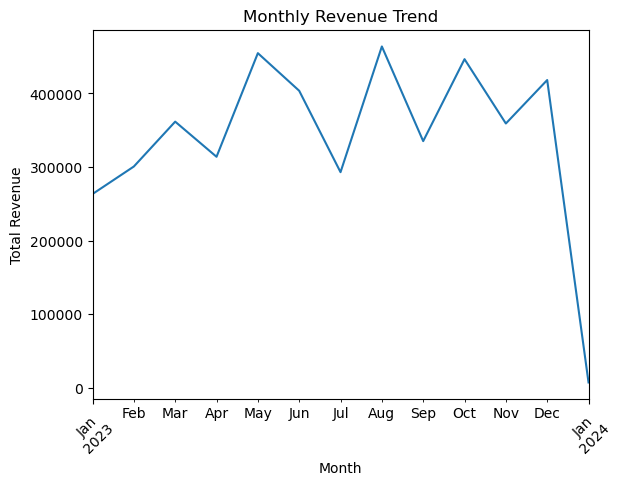

In [74]:
import matplotlib.pyplot as plt

monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

## Monthly Order Count

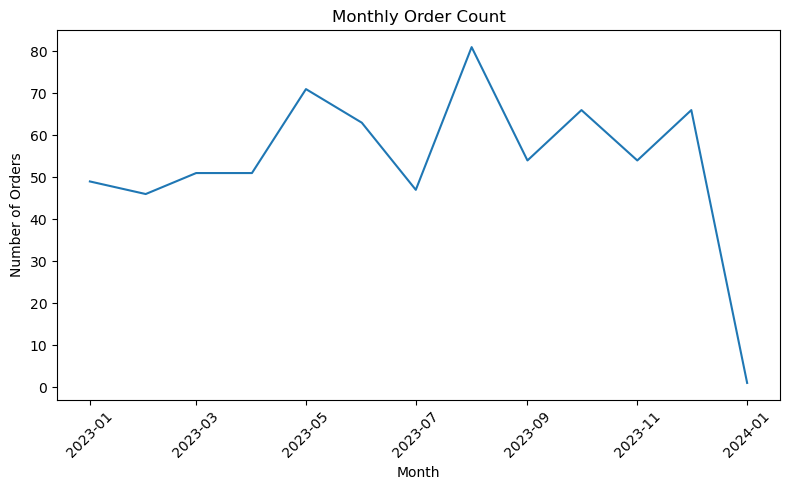

In [76]:
monthly_orders = df.groupby('order_month')['order_id'].count()

monthly_orders.index = monthly_orders.index.to_timestamp()

plt.figure(figsize=(8,5))
plt.plot(monthly_orders)

plt.title("Monthly Order Count")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()